In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('ggplot')


import seaborn as sns
# sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = 14,8
import datetime

In [2]:
# stock_price.csv
df = pd.read_csv("monthly-champagne-sales.csv",parse_dates=['Month'], index_col='Month')


In [68]:
df.head(20)

,Sales,year,month
Month,,,
1964-01-01,2815,1964,1
1964-02-01,2672,1964,2
1964-03-01,2755,1964,3
1964-04-01,2721,1964,4
1964-05-01,2946,1964,5
1964-06-01,3036,1964,6
1964-07-01,2282,1964,7
1964-08-01,2212,1964,8
1964-09-01,2922,1964,9


In [4]:
df.isnull().sum()

Sales    0
dtype: int64

In [5]:
df.shape

(105, 1)

In [6]:
df.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

# 2.Visualization Of Time Series

2.1 Time Plot

<AxesSubplot:xlabel='Month'>

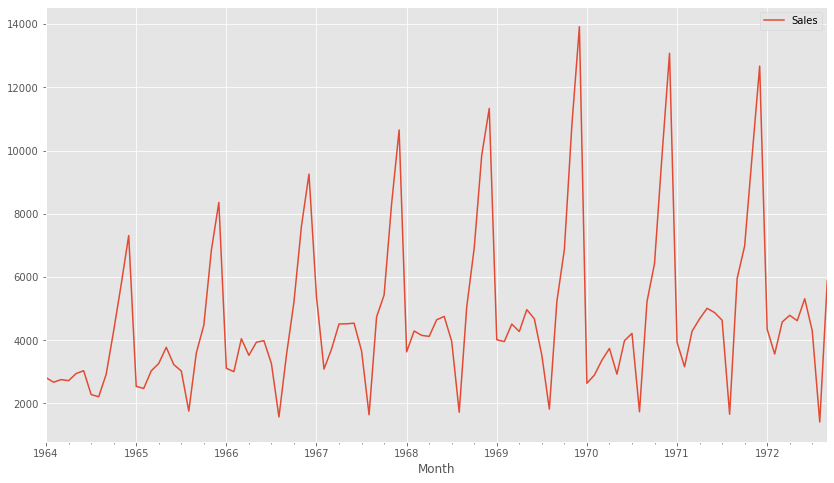

In [7]:
df.plot()

# 3.Stacked Line Plot

In [8]:
df["year"] = df.index.year
df["month"] = df.index.month
df.head()

,Sales,year,month
Month,,,
1964-01-01,2815,1964,1
1964-02-01,2672,1964,2
1964-03-01,2755,1964,3
1964-04-01,2721,1964,4
1964-05-01,2946,1964,5


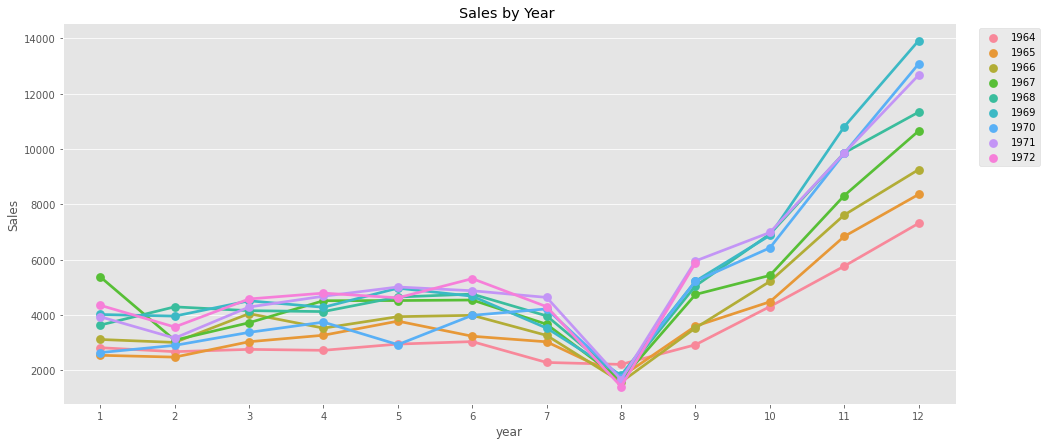

In [9]:
plt.figure(figsize=(16, 7))
sns.pointplot(x=df.index.month, y="Sales", hue='year',data=df,ci=False);
plt.xlabel("year")
plt.ylabel("Sales")
plt.title("Sales by Year ")
plt.legend(loc='upper right', bbox_to_anchor=(1.1,1));

3.1 Box Plot

Text(0.5, 1.0, 'Sales across year for each Month')

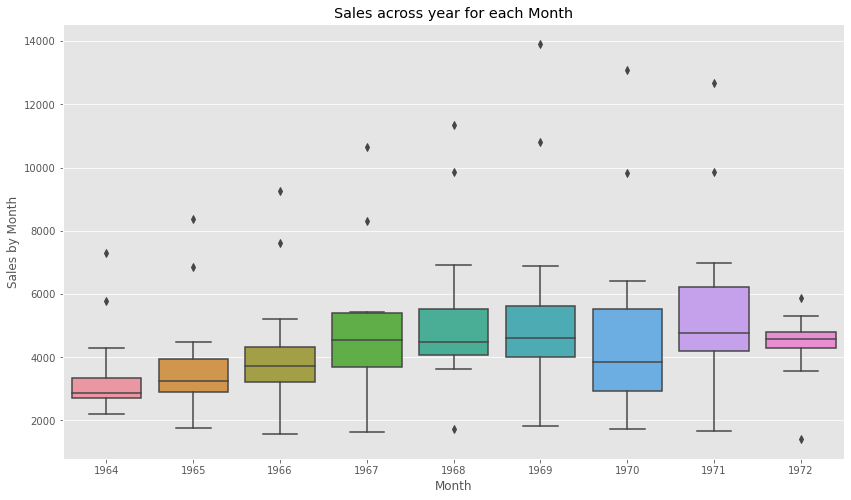

In [10]:
sns.boxplot(data=df,x=df.index.year,y='Sales')
plt.xlabel('Month')
plt.ylabel('Sales by Month')
plt.title('Sales across year for each Month')

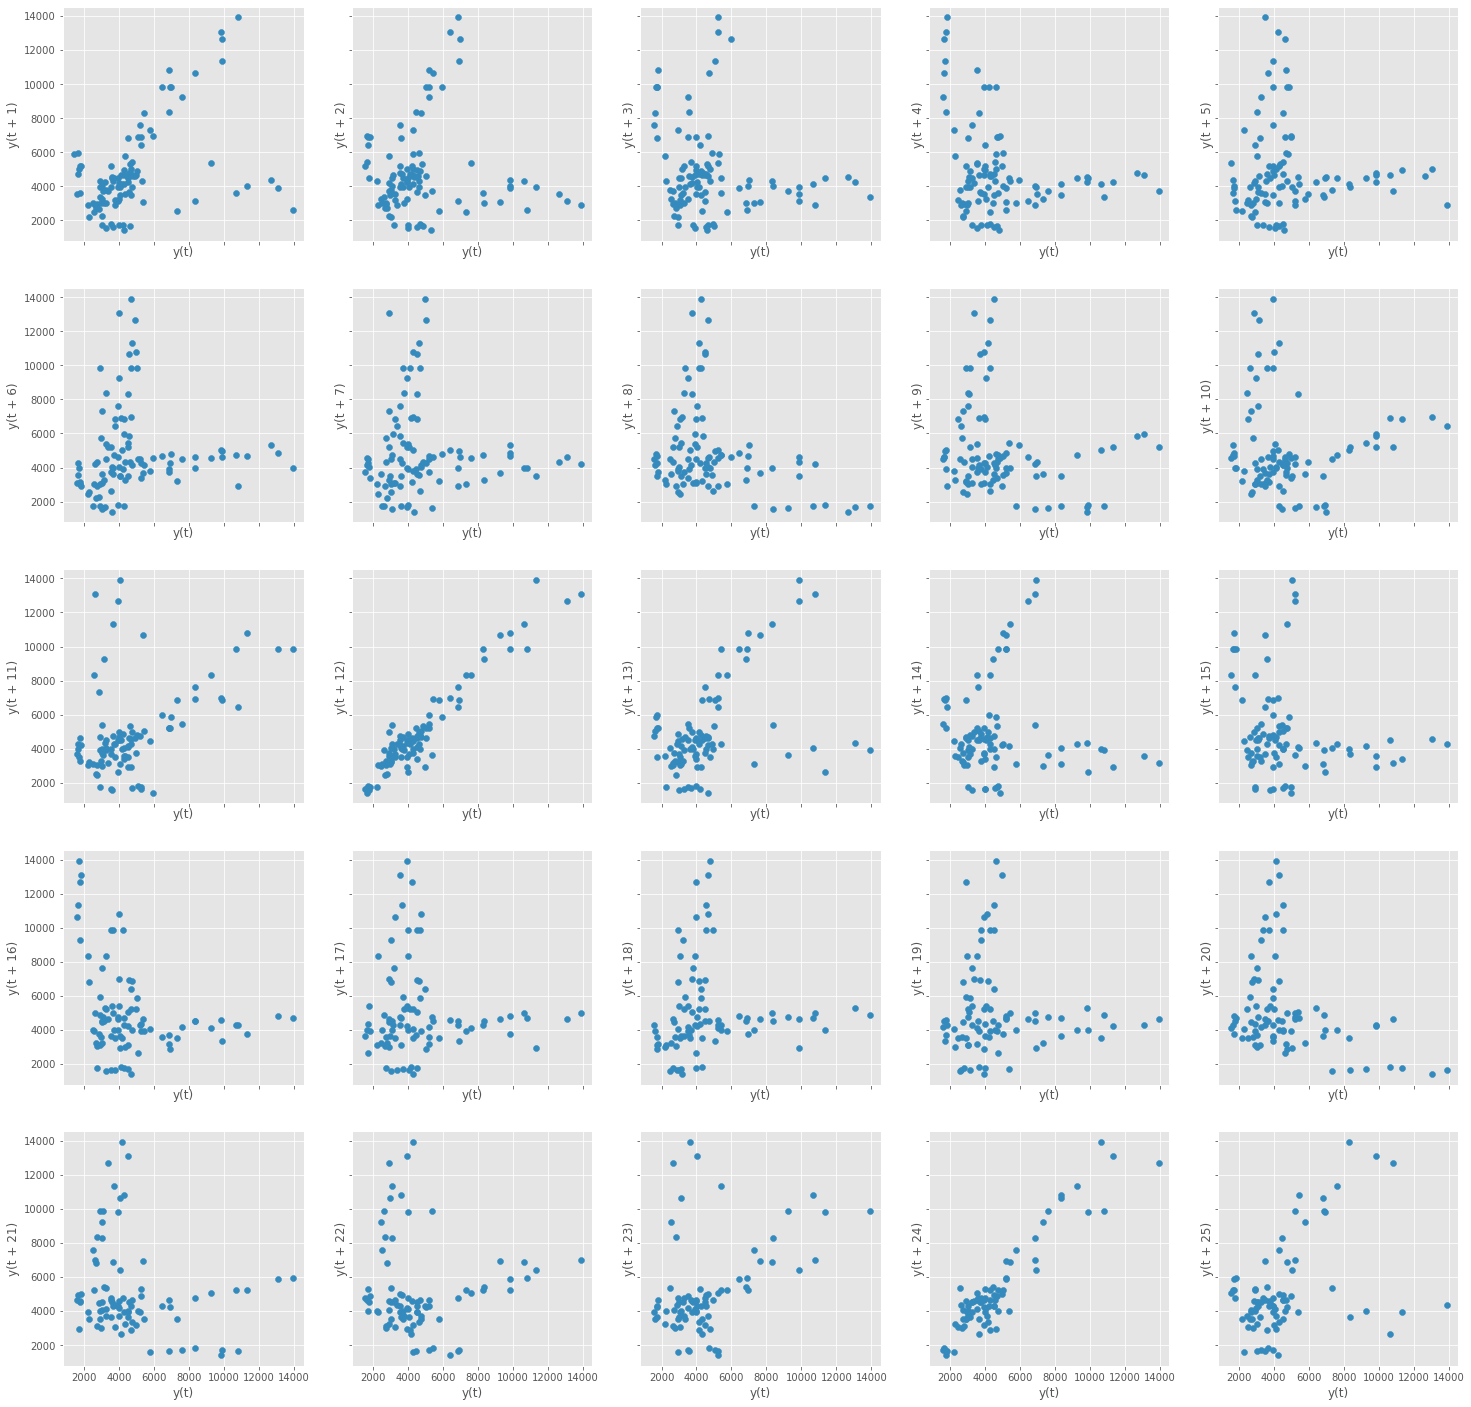

In [11]:
#Plotting 25 lag plots to determine randomness in data.
from pandas.plotting import lag_plot
plot_lags = 25
rows = int(plot_lags/5)
cols = int(plot_lags/5)
fig, axes = plt.subplots(rows, cols, sharex=True, sharey=True)
fig.set_figwidth(plot_lags)
fig.set_figheight(plot_lags)
count =1
for i in range(rows):
    for j in range(cols):
        lag_plot(df["Sales"], lag=count, ax=axes[i, j])
        count+=1

# 4.Autocorrelation Plot

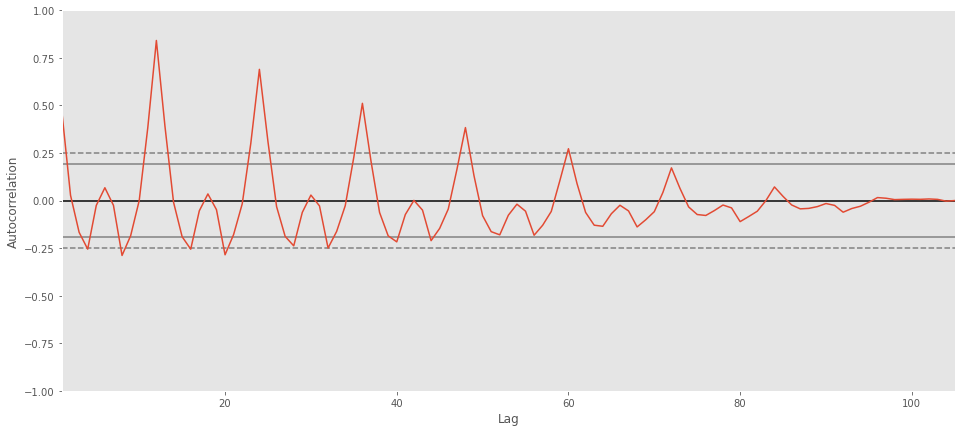

In [12]:
#Plotting graph to determine autocorrelation
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(16, 7))
autocorrelation_plot(df["Sales"]);

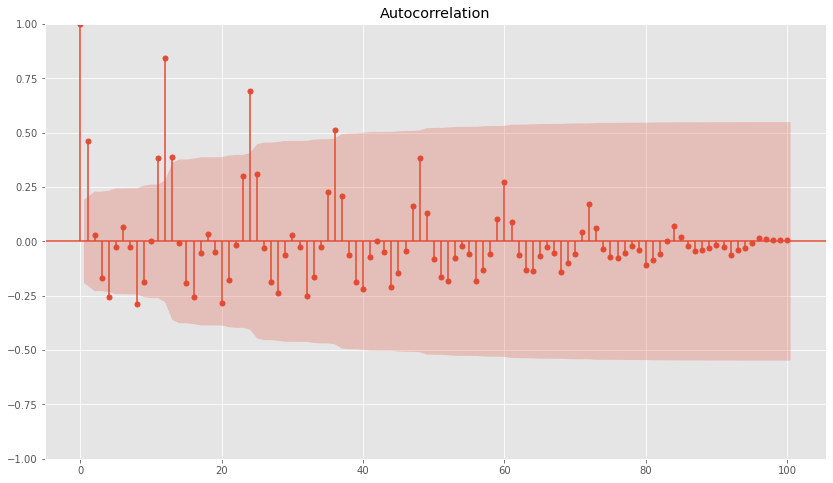

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df["Sales"], lags=100);

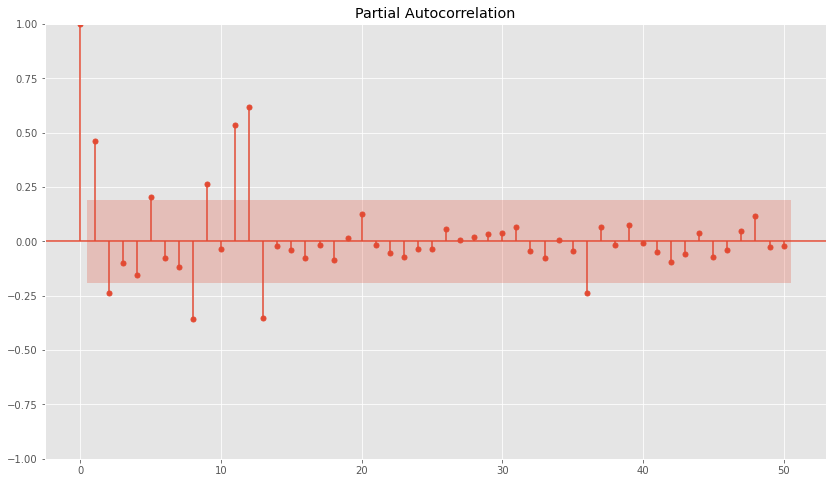

In [14]:
plot_pacf(df["Sales"], lags=50,method='ywm');

# 4.Visualization of Decomposed Time Series

<AxesSubplot:xlabel='Month'>

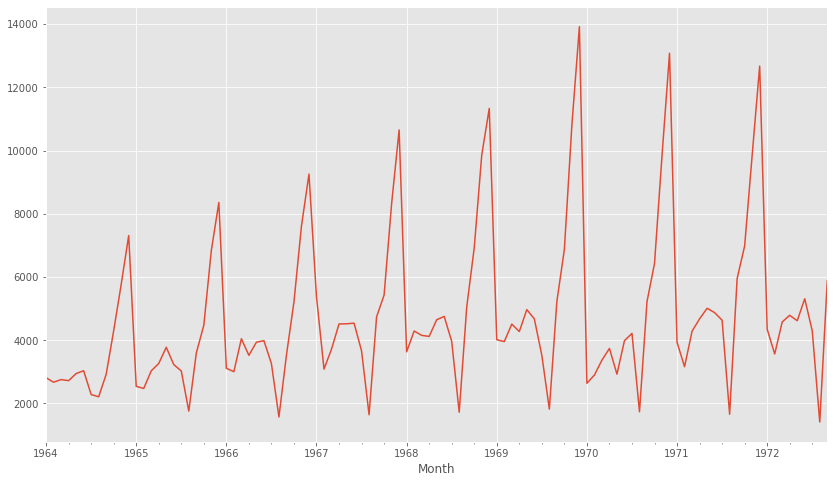

In [15]:
df['Sales'].plot()

In [16]:
df['Sales']

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
              ... 
1972-05-01    4618
1972-06-01    5312
1972-07-01    4298
1972-08-01    1413
1972-09-01    5877
Name: Sales, Length: 105, dtype: int64

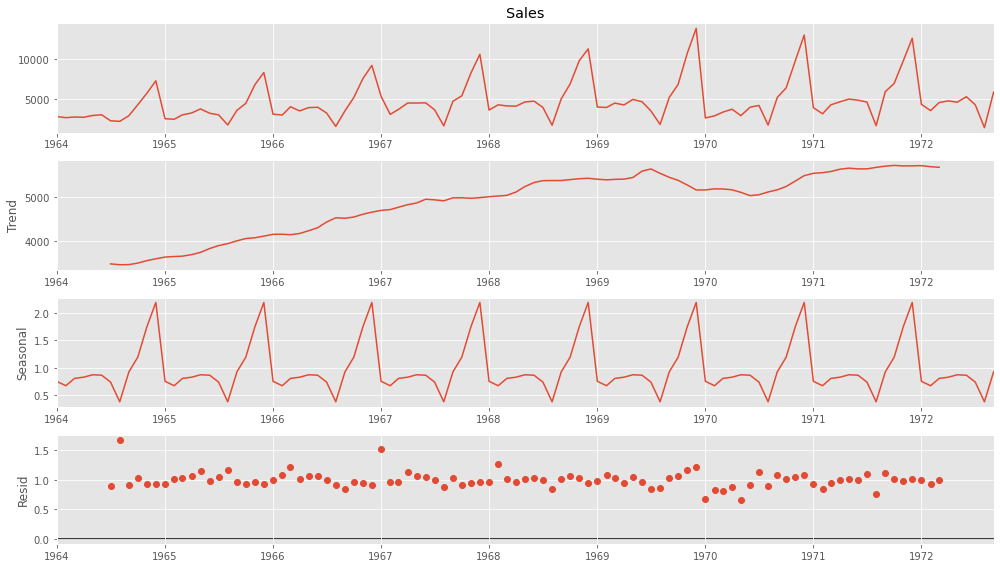

In [17]:
#Importing Decompose Model and plotting graph to see Trend, Seasonality, and Residuals 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Sales'],
                                   model='multiplicative')


decomposition.plot();


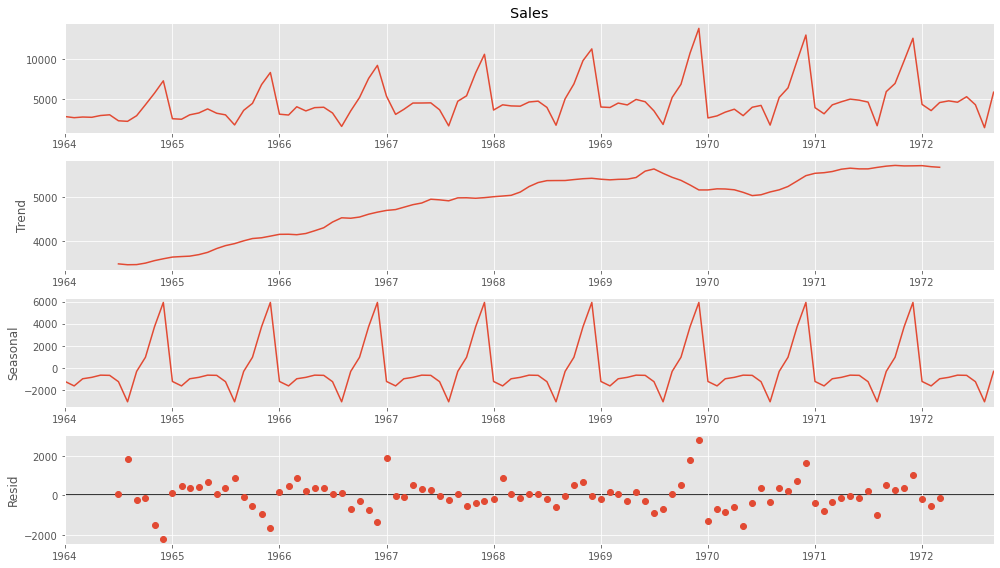

In [18]:
decomposition = seasonal_decompose(df['Sales'],
                                   model='additive')


decomposition.plot();

# 5.Train-Test Split

In [19]:
x_train = df[df.index.year < 1971]
x_test = df[df.index.year >= 1971]

In [20]:
x_train.shape,x_test.shape

((84, 3), (21, 3))

In [21]:
x_train.head()

,Sales,year,month
Month,,,
1964-01-01,2815,1964,1
1964-02-01,2672,1964,2
1964-03-01,2755,1964,3
1964-04-01,2721,1964,4
1964-05-01,2946,1964,5


In [22]:
x_train.tail()

,Sales,year,month
Month,,,
1970-08-01,1738,1970,8
1970-09-01,5221,1970,9
1970-10-01,6424,1970,10
1970-11-01,9842,1970,11
1970-12-01,13076,1970,12


# 6.Stationarity

Stationarity Check 

In [23]:
from statsmodels.tsa.stattools import adfuller


In [24]:
adfuller(x_train['Sales'])[1]

0.17340582029547325

Test Statistic                 -2.295554
p-value                         0.173406
#Lags Used                     11.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


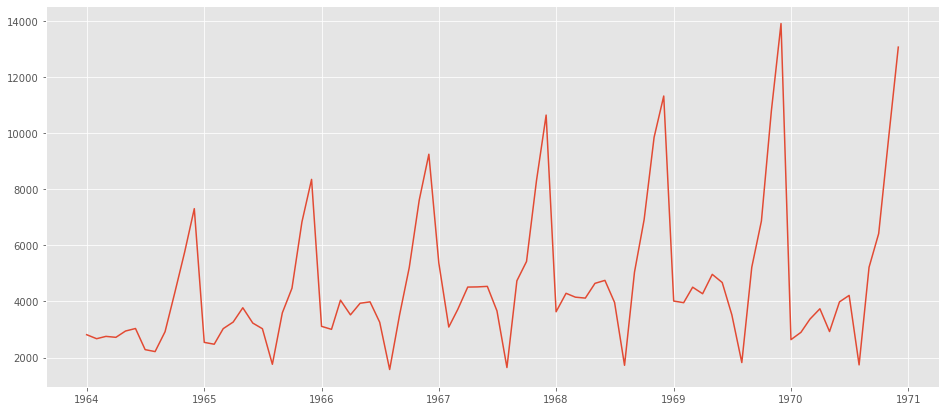

In [25]:
def stationarity_test(data):
    dftest = adfuller(data.Sales, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic',
                                'p-value',
                                '#Lags Used',
                                'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    plt.figure(figsize=(16, 7))
    plt.plot(data.index, data.Sales)
    plt.show()

stationarity_test(x_train)

Test Statistic                 -2.318672
p-value                         0.166017
#Lags Used                     11.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


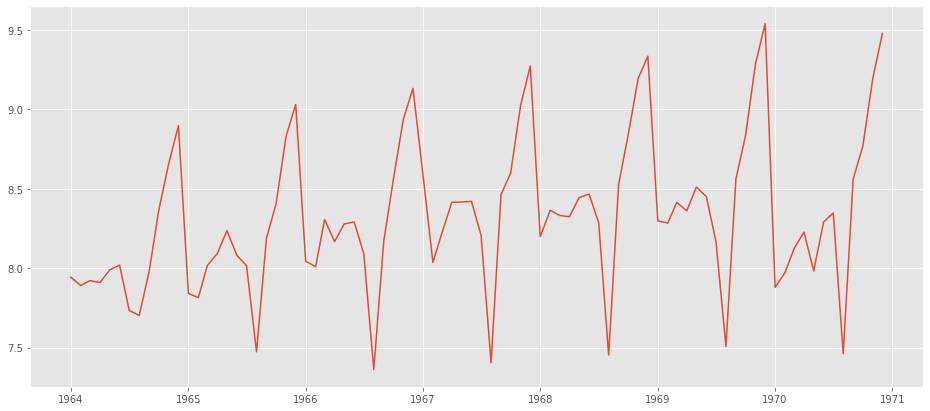

In [26]:
#Now take the log (To make variance constant) and check for stationary again 
import math
log_train = x_train
log_train = log_train["Sales"].apply(lambda x: math.log(x+1))
log_train = pd.DataFrame(log_train)
stationarity_test(log_train)

# 6.Stationary Check Post log transformation

Test Statistic                -1.436191e+01
p-value                        9.816328e-27
#Lags Used                     1.000000e+01
Number of Observations Used    7.300000e+01
Critical Value (1%)           -3.523284e+00
Critical Value (5%)           -2.902031e+00
Critical Value (10%)          -2.588371e+00
dtype: float64


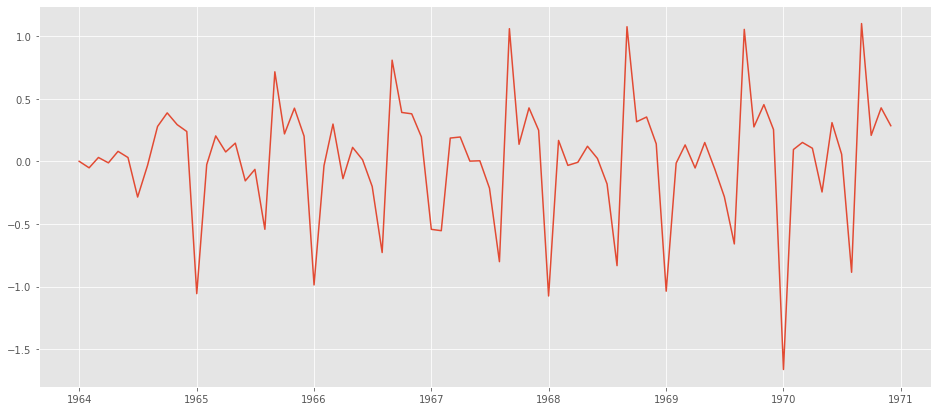

In [27]:
first_diff = log_train["Sales"] - log_train["Sales"].shift(1) #log_train['y'].diff().dropna()
first_diff = first_diff.fillna(0)
first_diff = pd.DataFrame(first_diff)
stationarity_test(first_diff)

Test Statistic                 -3.210025
p-value                         0.019412
#Lags Used                      2.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64


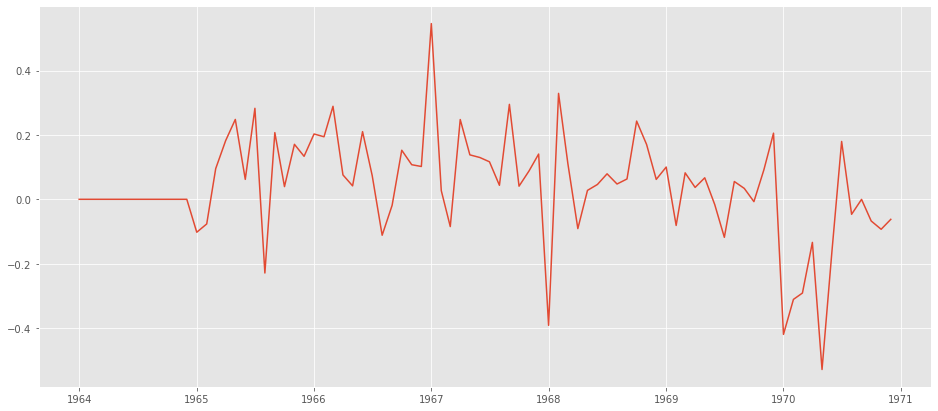

In [28]:
#Using Seasonal Differentiating for stationary check
seasonal_data_differenced = log_train["Sales"] - log_train["Sales"].shift(12)
seasonal_data_differenced = seasonal_data_differenced.fillna(0)
seasonal_data_differenced = pd.DataFrame(seasonal_data_differenced)
stationarity_test(seasonal_data_differenced)

# Plotting ACF and PACF plots to estimate p,q parameter values:

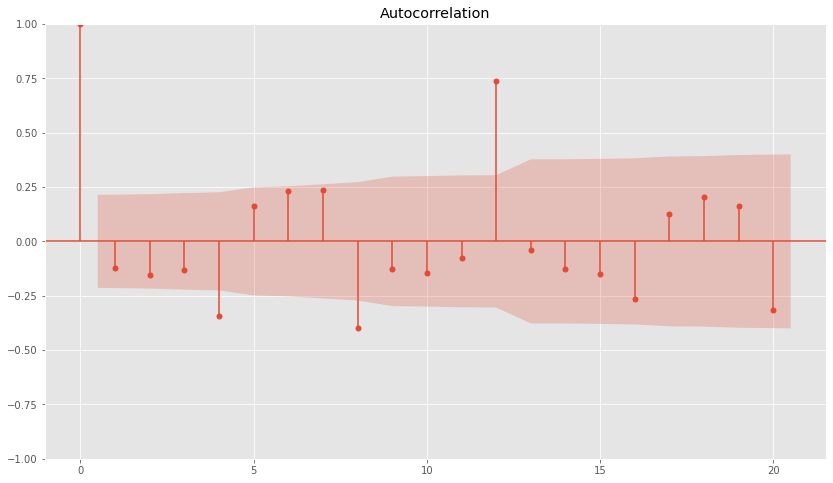

In [29]:
plot_acf(first_diff);

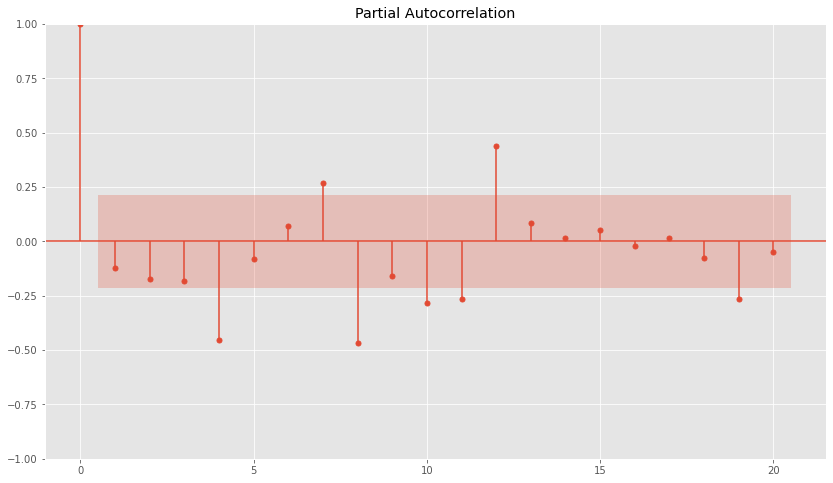

In [30]:
plot_pacf(first_diff,method='ywm');

In [47]:
#Plotting AR Model with p=2, d=1, q=0 
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(log_train, order=(2, 1, 0))  
results_AR = model.fit()

C:\Users\Dell\anaconda3\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [48]:
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   84
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -56.514
Date:                Wed, 14 Dec 2022   AIC                            119.029
Time:                        20:24:31   BIC                            126.285
Sample:                    01-01-1964   HQIC                           121.944
                         - 12-01-1970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1401      0.135     -1.034      0.301      -0.406       0.125
ar.L2         -0.1714      0.125     -1.373      0.170      -0.416       0.073
sigma2         0.2283      0.037      6.205      0.000       0.156       0.300
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 7.66
Prob(Q):                              0.74   Prob(JB):                         0.02
Heteroskedasticity (H):               2.52   Skew:                            -0.63
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
pred_AR = results_AR.forecast(len(x_test))
pred_AR = np.exp(pred_AR)-1 # converting log into normal values

In [50]:
pred_AR[:10]

1971-01-01    11679.552977
1971-02-01    11301.836931
1971-03-01    11575.968540
1971-04-01    11602.351998
1971-05-01    11551.101116
1971-06-01    11553.760029
1971-07-01    11562.158002
1971-08-01    11560.524684
1971-09-01    11559.313789
1971-10-01    11559.763398
Freq: MS, Name: predicted_mean, dtype: float64

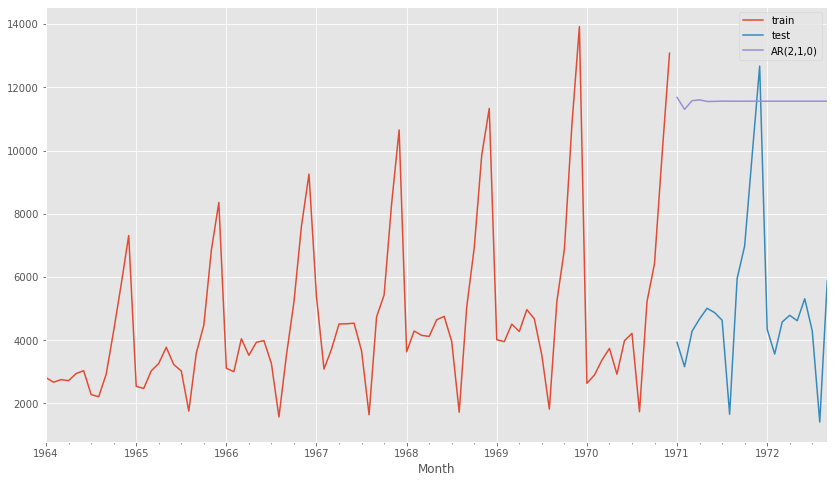

In [51]:

x_train['Sales'].plot(label = 'train')
x_test['Sales'].plot(label = 'test')
pred_AR.plot(label = 'AR(2,1,0)')
plt.legend();

# RMSE of AR Model Prediction

In [52]:
from statsmodels.tools.eval_measures import rmse
rmse(x_test['Sales'], pred_AR)

6911.580411548812

In [57]:
#Plotting MA Model with p=0, d=1, q=1 
# from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(log_train, order=(1, 1, 1))  
results_MA = model.fit()
pred_MA = results_MA.forecast(len(x_test))
pred_MA = np.exp(pred_MA)-1

C:\Users\Dell\anaconda3\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\New folder (2)\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dell\anaconda3\New folder (2)\lib\site-packages\statsmodels\tsa\st

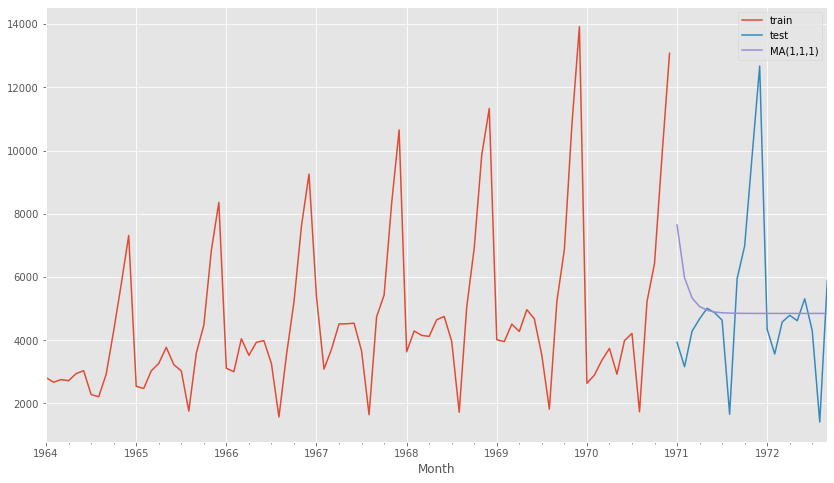

In [58]:
x_train['Sales'].plot(label = 'train')
x_test['Sales'].plot(label = 'test')
pred_MA.plot(label = 'MA(1,1,1)')
plt.legend();

In [61]:
rmse(x_test['Sales'],pred_MA)

2587.251709907955

In [65]:
#Using both AR and MA with differencing and applying ARIMA Model with p=2, d=1, q=1 
# from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(log_train, order=(1, 1, 1))  
results_ARIMA = model.fit()
# print(results_ARIMA.summary())

C:\Users\Dell\anaconda3\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\New folder (2)\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dell\anaconda3\New folder (2)\lib\site-packages\statsmodels\tsa\st

In [66]:
pred_ARIMA = results_ARIMA.forecast(len(x_test))
pred_ARIMA = np.exp(pred_ARIMA)-1

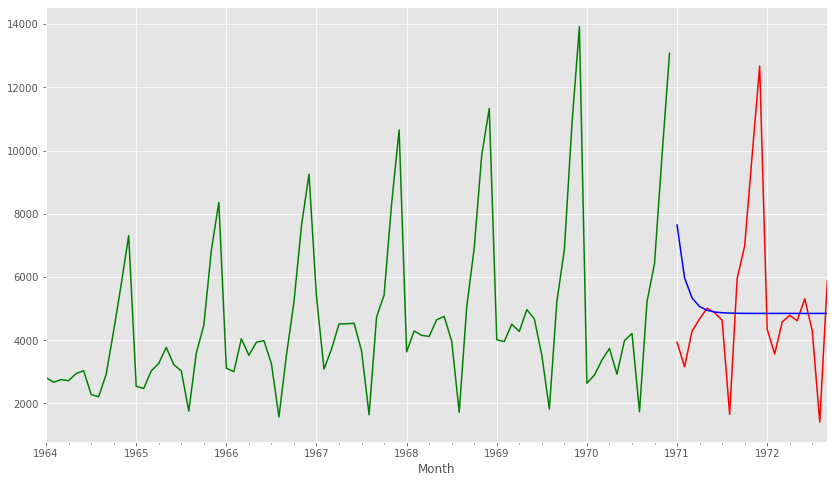

In [67]:
x_train['Sales'].plot(label = 'train',color='green')
x_test['Sales'].plot(label = 'test', color = 'red')
pred_ARIMA.plot(label = 'ARIMA(2,1,1)',color='blue');